1)Naive Simulation using matrix multiplication

Importing all necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Declaring all qubit operations and |0> qubit state as arrays

In [2]:
I=np.array([[1,0],[0,1]])
X=np.array([[0,1],[1,0]])
H=np.array([[1/(2**0.5),1/(2**0.5)],[1/(2**0.5),-1/(2**0.5)]])
CNOT=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
q0=([1,0])

Implementation of circuit to sequentially implement quantum gates on the quantum state vector

The circuit consists of:
1)Applying the Hadamard operator to the second qubit
2)Applying the CNOT operator to the first two qubits keeping the second and first qubits as control and target respectively
3)Applying the X gate to all remaining qubits

In [3]:
def ckt_sim(n):
    
    # Start with q0 and use np.kron to create the n-qubit |00...0> state
    
    state=q0
    i=2
    while(i<=n):
        state=np.kron(state,q0)
        i=i+1
        
    # Applying Hadamard to the second qubit (q1)
    
    if n>1:
        op1=np.kron(H,I)
        if n>2:
            j=3
            while(j<=n):
                op1=np.kron(I,op1)
                j=j+1
        state=np.dot(op1,state)
        
    #applying CNOT with q1 as control and q0 as target
    
    if n>1:
        op2=CNOT
        if n>2:
            j=3
            while(j<=n):
                op2=np.kron(I,op2)
                j=j+1
        state=np.dot(op2,state)
        
    #applying X to remaining qubits
    
    if n>2:
        op3=np.kron(X,np.kron(I,I))
        j=4
        while(j<=n):
            op3=np.kron(X,op3)
            j=j+1
        state=np.dot(op3,state)
    

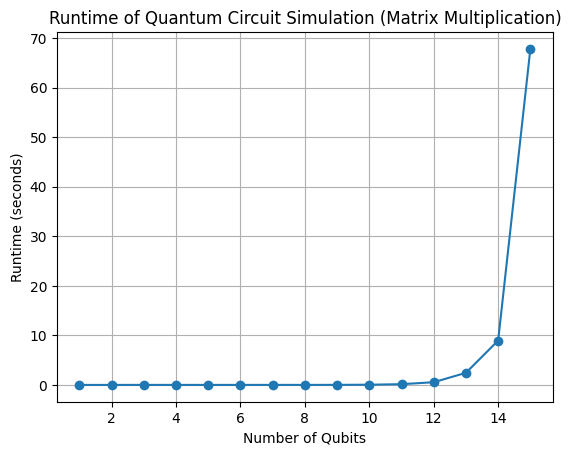

In [4]:
qubit_count=range(1,16)
runtimes=[]

for x in qubit_count:
    start_time=time.time()
    ckt_sim(x)
    end_time=time.time()
    runtimes.append(end_time-start_time)

plt.plot(qubit_count, runtimes, marker='o')
plt.title("Runtime of Quantum Circuit Simulation (Matrix Multiplication)")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.grid()
plt.show()   

Using this method, we are able to simulate 15 qubits before running into memory allocation errors. The plot shows us an exponential increase in runtime as we increase the number of qubits